In [4]:
import pyfolio
import pandas as pd
import yfinance as yf
import glob
import re
from sklearn import preprocessing
from datetime import timedelta, date, datetime
import matplotlib.pyplot as plt
import quantstats as qs
%matplotlib inline  

In [9]:
start_test = '2010-01-11'
end_test = '2021-03-27'

In [10]:
def get_price(ticker):
    stock = yf.Ticker(ticker)
    df = stock.history(period="max").reset_index()
    df['Adj Close'] = df['Close']
    df['ticker'] = ticker
    return df

In [11]:
dow30 = pd.read_csv('../datasets/dow30.csv')

In [9]:
sn = pd.DataFrame(columns=['Date','daily_return'])
for t in snp_t.ticker.unique():
    df = snp_t[snp_t.ticker == t]
    
    df['daily_return']=df['adjcp'].pct_change(1)
    
    sn = sn.append(df)

C:\Users\kaanb\Anaconda3\envs\agents\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [10]:
snpthirty = pd.DataFrame(columns=['Date','daily_return'])
for d in sn.Date.unique():
    mean_of_adj = sum(sn[sn.Date == d ]['daily_return']) / len(sn[sn.Date == d ]['daily_return'])
    df2= pd.DataFrame([[d,mean_of_adj]], columns=['Date','daily_return'])

    snpthirty = snpthirty.append(df2, ignore_index=True)
    
    
snpthirty['Date'] = pd.to_datetime(snpthirty['Date'])    
snpthirty = snpthirty[(snpthirty['Date'] > start_test) & (snpthirty['Date'] < end_test)]

In [11]:
def get_daily_return(df):
    df['daily_return']=df.account_value.pct_change(1)
    #df=df.dropna()
    print('Sharpe: ',(252**0.5)*df['daily_return'].mean()/ df['daily_return'].std())
    return df

In [12]:
def backtest_strat(df):
    strategy_ret= df.copy()
    strategy_ret['Date'] = pd.to_datetime(strategy_ret['Date'])
    strategy_ret.set_index('Date', drop = False, inplace = True)
    strategy_ret.index = strategy_ret.index.tz_localize('UTC')
    del strategy_ret['Date']
    ts = pd.Series(strategy_ret['daily_return'].values, index=strategy_ret.index)
    return ts

In [13]:
def get_account_value(model_name):
    df_account_value=pd.DataFrame()
    for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
        try:
            temp = pd.read_csv('results/account_value_trade_{}_{}.csv'.format(model_name,i))
            df_account_value = df_account_value.append(temp,ignore_index=True)
        except: break
    df_account_value = pd.DataFrame({'account_value':df_account_value['account_value']})
    sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
    print(sharpe)
    df_account_value=df_account_value.join(df_trade_date[63:].reset_index(drop=True))
    return df_account_value

In [14]:
def get_account_value_with_date(model_name):
    df_account_value=pd.DataFrame()
    listdir = glob.glob('results/account_value_trade_{}_*.csv'.format(model_name))
    for cs in listdir:
        temp = pd.read_csv(cs)
        df_account_value = df_account_value.append(temp,ignore_index=True)
    print(df_account_value)
    df_account_value = pd.DataFrame({'account_value':df_account_value['account_value']})
    sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
    print(sharpe)
    df_account_value=df_account_value.join(df_trade_date[63:].reset_index(drop=True))
    return df_account_value

In [15]:
rebalance_window = 63
validation_window = 63
unique_trade_date = snpthirty[(snpthirty.Date > start_test)&(snpthirty.Date <= end_test)].Date.unique()

In [16]:
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

In [18]:
ensemble_account_value = get_account_value('warren-v0')

1.1550428677132045


In [19]:
ensemble_account_value = ensemble_account_value.rename(columns={'datadate':'Date'})

<AxesSubplot:xlabel='Date'>

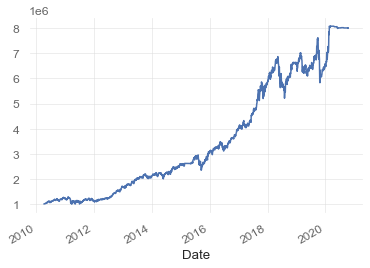

In [20]:
ensemble_account_value.set_index('Date').account_value.plot()

In [21]:
ensemble_account_value = get_daily_return(ensemble_account_value)



Sharpe:  1.1550428677132045


In [22]:
es = backtest_strat(ensemble_account_value)

In [23]:
estwo = es
estwo.index = pd.DatetimeIndex([i.replace(tzinfo=None) for i in estwo.index])


In [24]:
nas_strat = backtest_strat(snpthirty)
nas_strat.index = pd.DatetimeIndex([i.replace(tzinfo=None) for i in nas_strat.index])


In [25]:
# extend pandas functionality with metrics, etc.
qs.extend_pandas()

In [26]:
#qs.reports.full(nas_strat)

                           Strategy
-------------------------  ----------
Start Period               2010-04-14
End Period                 2020-10-14
Risk-Free Rate             0.0%
Time in Market             92.0%

Cumulative Return          701.09%
CAGR%                      21.9%

Sharpe                     1.15
Sortino                    1.68
Sortino/√2                 1.19

Max Drawdown               -24.11%
Longest DD Days            527
Volatility (ann.)          18.68%
Calmar                     0.91
Skew                       -0.26
Kurtosis                   6.25

Expected Daily %           0.08%
Expected Monthly %         1.65%
Expected Yearly %          20.82%
Kelly Criterion            10.9%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.85%
Expected Shortfall (cVaR)  -1.85%

Gain/Pain Ratio            0.25
Gain/Pain (1M)             1.72

Payoff Ratio               1.01
Profit Factor              1.25
Common Sense Ratio         1.27
CPC Index                

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2018-05-14,2018-08-03,2019-02-12,274,-24.105199,-21.032987
2,2019-09-30,2019-10-23,2020-02-13,136,-23.498388,-22.650726
3,2011-02-16,2011-04-01,2012-07-27,527,-22.916577,-21.511069
4,2015-08-11,2015-09-18,2015-12-09,120,-20.740931,-20.503080
5,2019-02-25,2019-05-20,2019-09-11,198,-13.135616,-12.525839


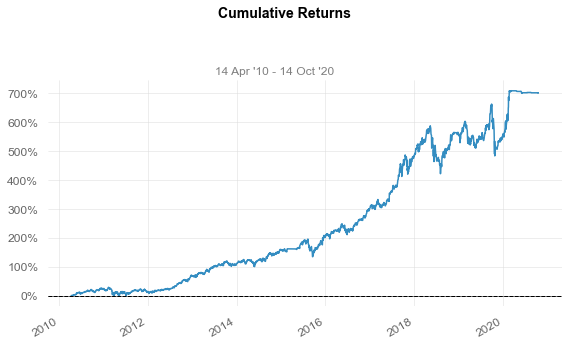

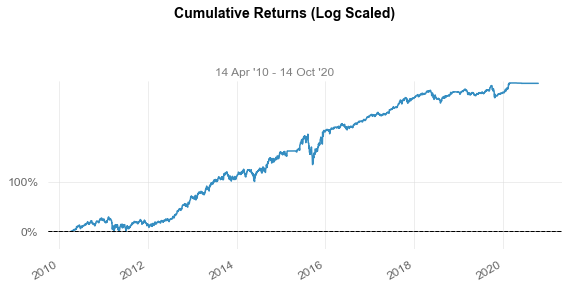

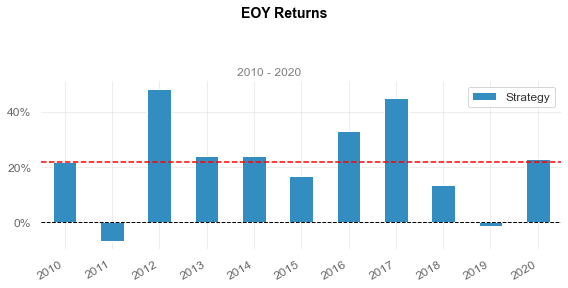

TypeError: 'method' object is not subscriptable

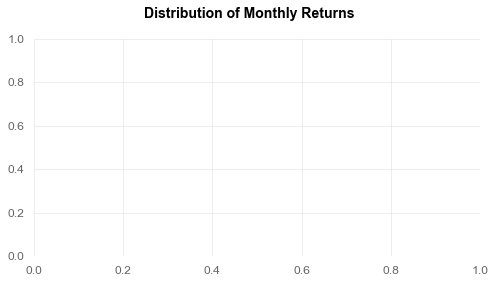

In [27]:
portfolio = qs.reports.full(estwo)

In [29]:
qs.reports.html(estwo)

In [28]:

with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = estwo,
                                   
                                    set_context=False)

Start date,2010-04-14
End date,2020-10-14
Total months,126
,Backtest
Annual return,21.9%
Cumulative returns,701.1%
Annual volatility,18.7%
Sharpe ratio,1.16
Calmar ratio,0.91
Stability,0.98
Max drawdown,-24.1%


AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'

In [30]:

with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = nas_strat, set_context=False)

C:\Users\kaanb\Anaconda3\envs\agents\lib\site-packages\numpy\lib\nanfunctions.py:1541: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')
C:\Users\kaanb\Anaconda3\envs\agents\lib\site-packages\empyrical\stats.py:396: RuntimeWarning: invalid value encountered in subtract
  nanmin((cumulative - max_return) / max_return, axis=0, out=out)
C:\Users\kaanb\Anaconda3\envs\agents\lib\site-packages\numpy\lib\function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\kaanb\Anaconda3\envs\agents\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Start date,2010-01-12
End date,2021-03-26
Total months,134
,Backtest
Annual return,inf%
Cumulative returns,inf%
Annual volatility,nan%
Sharpe ratio,NaN
Calmar ratio,NaN
Stability,NaN
Max drawdown,0.0%


IndexError: index -1 is out of bounds for axis 0 with size 0